- [2.1 Overview](#2_1)
- [2.2 Loading and Imports](#2_2)
- [2.3 Data Exploration](#2_3)
- [2.4 Ratings](#2_4)
   - [2.4.1 Firms](#2_4_1)
   - [2.4.2 Categorical Column](#2_4_2)
   - [2.4.3 Job Titles](#2_4_3)
   - [2.4.4 Current Column](#2_4_4)
   - [2.4.5 Location](#2_4_5)
   - [2.4.6 Resampling](#2_4_6)
- [2.5 Reviews](#2_5)
- [2.6 Exporting](#2_6)

### 2.1 Overview <a id = "2_1"></a>

We are interested in the industry specific factors that cause employee satisfaction or dissatisfaction across industries. By the end of the project, 
- Improving employee attrition rate (across and industry specific)
- Improving employee efficiency via company incentives 
- Removing negative varibales and save resources by allocating them to employee support

We review the Glassdoor job reviews dataset and analyze customer reviews and ratings from different companies/firms and cities
- What are key terms employees are looking for in general job settings?
- What factors are favoured across all industries? 
- What factors are favoured across specific industires (ex: finance vs tech vs fastfood)

We will use a mix of classification and sentiment analysis to clarify our understanding of the problem


### 2.2 Loading and Imports <a id = '2_2'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import spacy

import os

In [3]:
### Not in the main notebook due to size, adjust as directory as necessary
df = pd.read_csv('/Users/Andre/OneDrive/Desktop/1_Glassdoor_Project/glassdoor_reviews.csv')

### 2.3 Data Exploration<a id = '2_3'></a>

In [4]:
df.head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541223 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [6]:
df.shape

(838566, 18)

800000 entries, this will take too much computational resource to process later on. Let's keep this in mind as we filter out our dataset later on

In [7]:
df.describe()

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,838566.000000,688672.000000,647193.000000,136066.000000,691065.000000,688484.000000,682690.000000
mean,3.655956,3.375735,3.590164,3.966612,3.461825,3.398109,3.176576
std,1.174684,1.305874,1.323280,1.190937,1.271295,1.218738,1.330720
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
## Check how much null
(df.isnull().sum() / df.shape[0]) * 100

firm                    0.000000
date_review             0.000000
job_title               0.000000
current                 0.000000
location               35.458509
overall_rating          0.000000
work_life_balance      17.875039
culture_values         22.821459
diversity_inclusion    83.773967
career_opp             17.589671
comp_benefits          17.897458
senior_mgmt            18.588400
recommend               0.000000
ceo_approv              0.000000
outlook                 0.000000
headline                0.308861
pros                    0.000239
cons                    0.001550
dtype: float64

array([[<Axes: title={'center': 'overall_rating'}>,
        <Axes: title={'center': 'work_life_balance'}>,
        <Axes: title={'center': 'culture_values'}>],
       [<Axes: title={'center': 'diversity_inclusion'}>,
        <Axes: title={'center': 'career_opp'}>,
        <Axes: title={'center': 'comp_benefits'}>],
       [<Axes: title={'center': 'senior_mgmt'}>, <Axes: >, <Axes: >]],
      dtype=object)

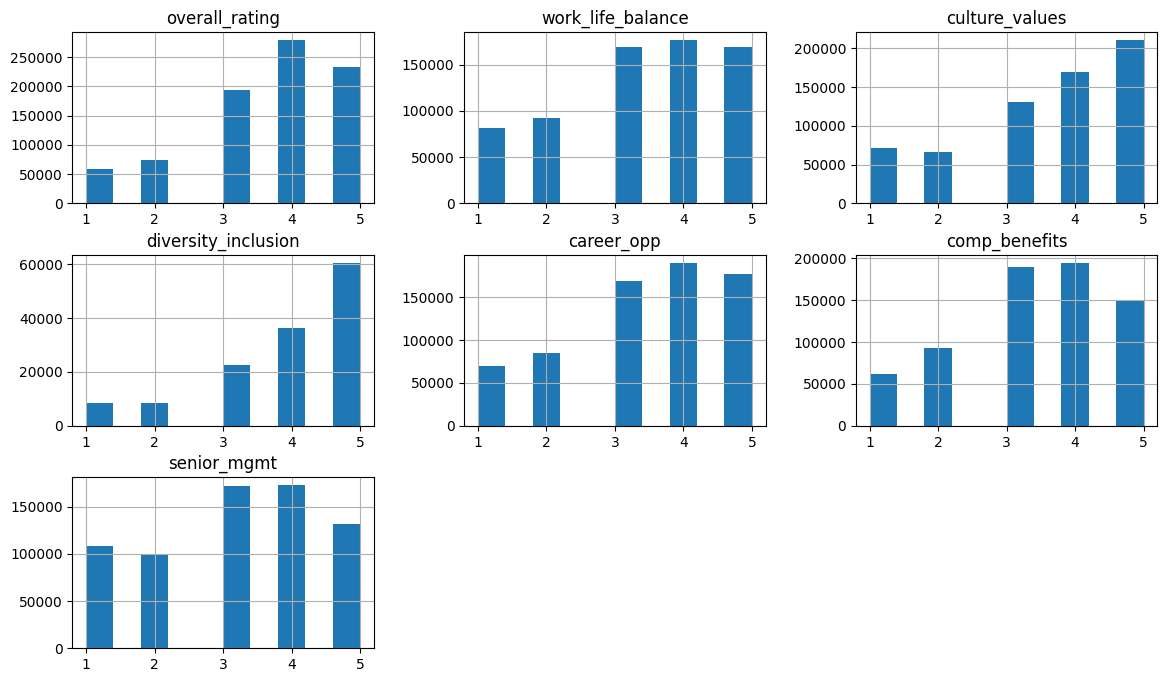

In [9]:
df.hist(figsize = (14,8))

The categorical data looks spread out, with more skew towards positive ratings. 

### 2.4 Ratings  <a id = '2_4'></a>

Upon first glance, we see various things to note about the dataset:
- How many firms, jobs, and location are we working with? We may need to classify these firms
- It looks like diversity inclusion has a lot of missing values, may need to drop?
- Some categorical have the values: v - Positive, r - Mild, x - Negative, o - No opinion 
- Current employee gives the timeframe of employee, we can translate that to categorical data of how long they've worked already
- Should we pull outside information on job_title and location? Let's take a closer look
- Keep location or not (US vs Britian etc)

In [10]:
df.nunique()

firm                      428
date_review              4813
job_title               62275
current                    29
location                14486
overall_rating              5
work_life_balance           5
culture_values              5
diversity_inclusion         5
career_opp                  5
comp_benefits               5
senior_mgmt                 5
recommend                   3
ceo_approv                  4
outlook                     4
headline               390454
pros                   778559
cons                   777133
dtype: int64

#### 2.4.1 Firms <a id = "2_4_1"></a>
- With 428 firms at play and 800000 data entries, there must be some companies that have more reviews than others

<Axes: xlabel='firm'>

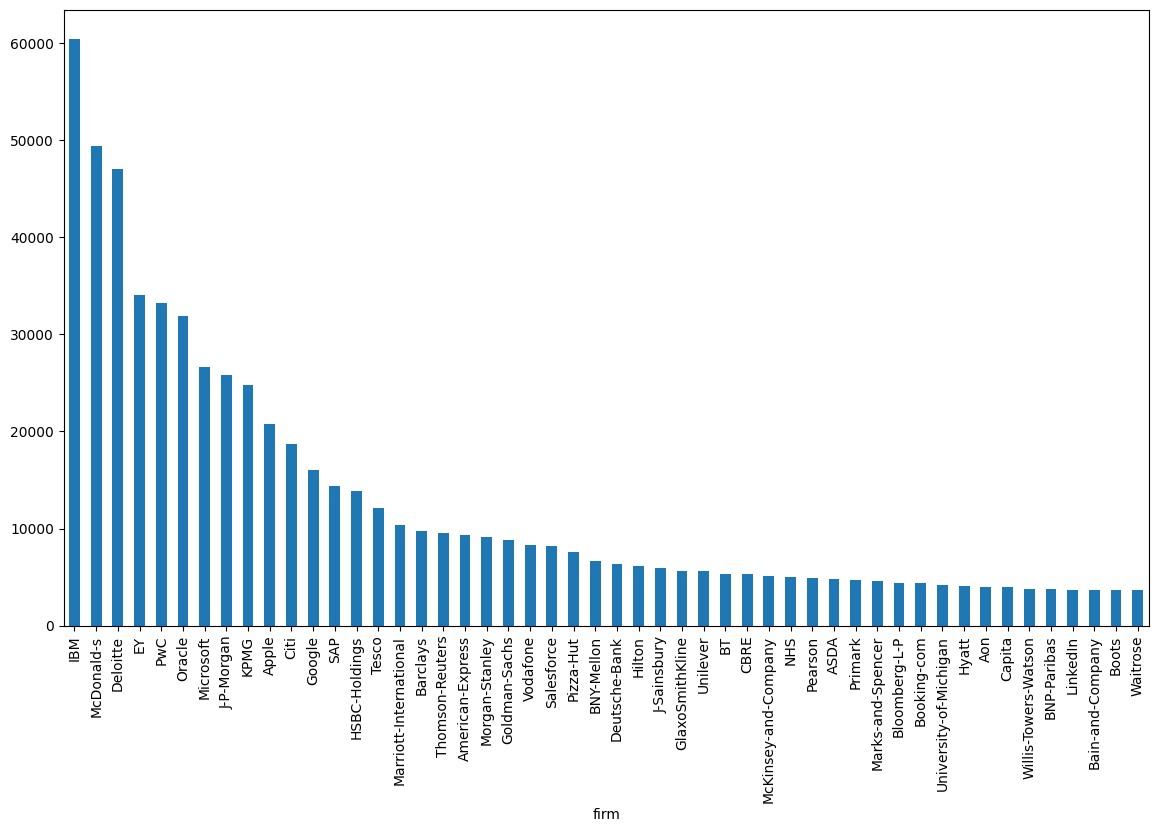

In [11]:
### 428 firms, what are the major firms at play?
df_firms = df['firm']
countfirms = df_firms.value_counts().sort_values(ascending = False).head(50)
countfirms.plot(kind ='bar', figsize= (14,8))

#### There is a lot of IBM (60000) and McDonalds (50000). 
- We may need to resample and make extract data evenly among these firms to get a fairer assessment. We'll keep this in mind for later

In [12]:
### Ok, let's see the other end
df_firms.value_counts().sort_values(ascending = False).tail(20)

firm
National-Star                                         19
BayWa-r-e-renewable-energy                            18
UHMBT                                                 17
Engineering-and-Physical-Sciences-Research-Council    17
UK-Border-Agency                                      16
The-National-Gallery                                  15
Southern-Health-and-Social-Care-Trust                 13
Western-Health-and-Social-Care-Trust                  12
The-Coal-Authority                                    12
Abertawe-Bro-Morgannwg-University-Health-Board         9
Somerset-Partnership-NHS-Foundation-Trust              8
Penderels-Trust                                        7
Achieving-for-Children                                 6
National-Offender-Management-Service                   6
Office-of-Rail-Regulation                              5
i-Net-Solution                                         4
Health-Protection-Agency                               4
The-Survey-Association    

Most of these firms are never heard of and don't represent main industries, let's remove some of the lesser reviewed firms. Threshold = 1000

In [13]:
### Get all firms with at least 1000 reviews
firms_to_keep = countfirms[countfirms >= 1000].index
df = df[df['firm'].isin(firms_to_keep)]
print(df.shape, df['firm'].nunique())

(633322, 18) 50


In [14]:
#600000 data sets and 50 firms

### Let's check how much of each value is null
(df.isnull().sum() / df.shape[0]) * 100

firm                    0.000000
date_review             0.000000
job_title               0.000000
current                 0.000000
location               36.539707
overall_rating          0.000000
work_life_balance      18.389382
culture_values         24.128800
diversity_inclusion    84.364668
career_opp             18.095850
comp_benefits          18.362065
senior_mgmt            19.082868
recommend               0.000000
ceo_approv              0.000000
outlook                 0.000000
headline                0.336796
pros                    0.000000
cons                    0.001105
dtype: float64

- The 83% of diversity inclusion is null values, we will drop this
- Location is questionable, let's see what we can extract from it later
- date_review isn't needed, let's drop it

#### 2.4.2 Categorical Column Assessment <a id = '2_4_2'></a>

Lets use label-encoding for recommend, ceo_approv, and outlook
- recall: v - Positive, r - Mild, x - Negative, o - No opinion 

In [15]:
# we don't need to date_review as well, we drop this
df = df.drop(['date_review','diversity_inclusion'], axis = 1)

In [16]:
df.head(3)

,firm,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1222,ASDA,Night Stocker,Former Employee,"Brighton, England, England",3,1.0,NaN,1.0,3.0,2.0,o,r,o,night stocker,"easily to get, relatively high pay , consideri...",nihgt time work means very litle of proper lif...
1223,ASDA,Night Replenishment Manager,Current Employee,"Middlesbrough, England, England",2,3.0,NaN,3.0,3.0,2.0,o,r,o,asda night manager,asda can be fun if you are left to do your job...,a lack of communication between management res...
1224,ASDA,,Current Employee,"Widnes, England, England",3,3.0,NaN,2.0,3.0,2.0,o,x,o,"Pays the bills, but after that...nothing special",The colleagues...great bunch of people. Majori...,The managers are fussy and overly interfering....


In [17]:
### Let's encode it such that no opinion = null (o), negative (x) = 1, mild (r) = 3, positive(v) = 5 so it's onpar with the other ratings

rating_columns = ['recommend', 'ceo_approv', 'outlook']

key = {'o': None, 'x': 1, 'r': 3, 'p': 5}

for column in rating_columns:
    df[column] = df[column].map(key)

In [18]:
df.head(3)

,firm,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1222,ASDA,Night Stocker,Former Employee,"Brighton, England, England",3,1.0,NaN,1.0,3.0,2.0,NaN,3.0,NaN,night stocker,"easily to get, relatively high pay , consideri...",nihgt time work means very litle of proper lif...
1223,ASDA,Night Replenishment Manager,Current Employee,"Middlesbrough, England, England",2,3.0,NaN,3.0,3.0,2.0,NaN,3.0,NaN,asda night manager,asda can be fun if you are left to do your job...,a lack of communication between management res...
1224,ASDA,,Current Employee,"Widnes, England, England",3,3.0,NaN,2.0,3.0,2.0,NaN,1.0,NaN,"Pays the bills, but after that...nothing special",The colleagues...great bunch of people. Majori...,The managers are fussy and overly interfering....


In [19]:
#let's recheck our columns now that we mapped our values
(df.isnull().sum() / df.shape[0]) * 100

firm                  0.000000
job_title             0.000000
current               0.000000
location             36.539707
overall_rating        0.000000
work_life_balance    18.389382
culture_values       24.128800
career_opp           18.095850
comp_benefits        18.362065
senior_mgmt          19.082868
recommend            80.436176
ceo_approv           72.600036
outlook              72.786355
headline              0.336796
pros                  0.000000
cons                  0.001105
dtype: float64

In [20]:
### A lot of none values for these rating columns, let's drop these rating columns then
for column in rating_columns:
    df = df.drop(column, axis = 1)

In [21]:
df.head(3)

,firm,job_title,current,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,headline,pros,cons
1222,ASDA,Night Stocker,Former Employee,"Brighton, England, England",3,1.0,NaN,1.0,3.0,2.0,night stocker,"easily to get, relatively high pay , consideri...",nihgt time work means very litle of proper lif...
1223,ASDA,Night Replenishment Manager,Current Employee,"Middlesbrough, England, England",2,3.0,NaN,3.0,3.0,2.0,asda night manager,asda can be fun if you are left to do your job...,a lack of communication between management res...
1224,ASDA,,Current Employee,"Widnes, England, England",3,3.0,NaN,2.0,3.0,2.0,"Pays the bills, but after that...nothing special",The colleagues...great bunch of people. Majori...,The managers are fussy and overly interfering....


#### 2.4.3 Job Titles <a id = '2_4_3'></a>
- This will play an important role in identifying specific trends for satisfaction for different industries

In [22]:
### Most common job titles?
df_job = df['job_title']
df_job.value_counts().head(20)

job_title
 Anonymous Employee          124168
                              64433
 Manager                      12091
 Consultant                   10507
 Software Engineer             9738
 Senior Consultant             9508
 Associate                     8885
 Analyst                       8505
 Crew Member                   7739
 Senior Associate              5955
 Cashier                       5426
 Vice President                4653
 Senior Manager                4477
 Assistant Manager             4404
 Senior Software Engineer      4320
 Director                      4200
 Business Analyst              4151
 Customer Assistant            4115
 Project Manager               4078
 Software Developer            2856
Name: count, dtype: int64

In [23]:
#number of different jobtitles
df_job.nunique()

45208

In [24]:
### interestingly job_title also has empty values/anonymous but not displayed as null
### I can remove these two, but it may cause biases. Let's check on the proportion of these data points

# Let's give them null status first
df['job_title'] = df['job_title'].str.strip()   ## get rid of all white space in front of titles
df['job_title'].replace({'':None, 'Anonymous Employee':None}, inplace=True)
(df.isnull().sum() / df.shape[0]) * 100

df_anonymous = df[df['job_title'].isnull()]
df_anonymous.shape

(188601, 13)

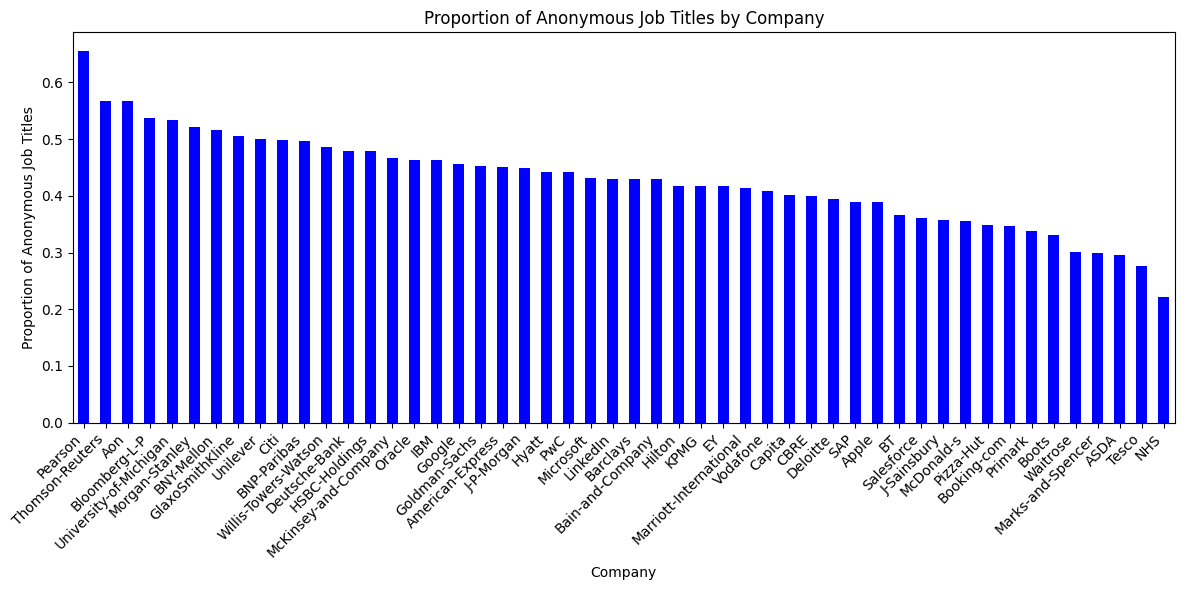

In [28]:
# do analysis on these null jobs
proportion_anonymous = df_anonymous.groupby('firm').size() / df.groupby('firm').size()

plt.figure(figsize=(12, 6))
proportion_anonymous.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.xlabel('Company')
plt.ylabel('Proportion of Anonymous Job Titles')
plt.title('Proportion of Anonymous Job Titles by Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This looks rather balanced out, Pearsons has the highest anonymouse rate, but overall this looks distributed between all the companies.

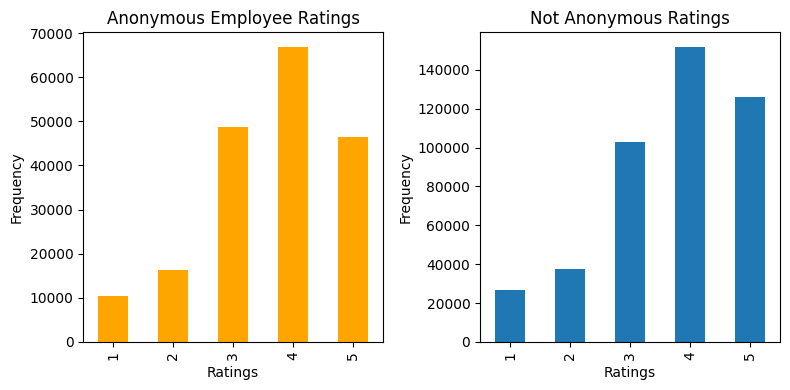

In [32]:
### What about ratings? Perhaps anonymous employees wants to hide thier identity in fear of being fired?
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

#first
axs[0].set_title("Anonymous Employee Ratings")
ratings_anony = df_anonymous['overall_rating'].value_counts().sort_index() #plot value_counts not each variable
ratings_anony.plot(kind = 'bar', ax = axs[0], color = 'orange')
axs[0].set_xlabel('Ratings')
axs[0].set_ylabel('Frequency')

#second
df_not_anonymous = df[df['job_title'] != None]
ratings_not_anony = df_not_anonymous['overall_rating'].value_counts().sort_index()
axs[1].set_title("Not Anonymous Ratings")
ratings_all = df['overall_rating'].value_counts().sort_index()
ratings_all.plot(kind = 'bar',  ax = axs[1])
axs[1].set_xlabel('Ratings')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Decision:
- It looks like there is a lot of tech and financial firms along with logistics/hospilatlity/retail/food industries in this list. This looks spread out among industries.
- The ratings for these two look nearly identical, it looks like bias isn't that strong. Let's remove it then.

We will eliminate all the anonymous job titles as bias isn't strong, and employee title will be a crucial feature for us later on

In [33]:
df = df.dropna(subset = 'job_title', axis=0)
df.shape

(444721, 13)

#### 2.4.4 Current <a id ='2_4_4'></a>
- Current provides us two different values, we may need to seperate this into 2 new columns

In [34]:
df.current.head(20)

1222                        Former Employee
1223                       Current Employee
1225                        Former Employee
1226                       Current Employee
1228                        Former Employee
1229                        Former Employee
1230                       Current Employee
1231                        Former Employee
1232                        Former Employee
1233                        Former Employee
1234                       Current Employee
1235                        Former Employee
1236                       Current Employee
1237                        Former Employee
1239                       Current Employee
1240    Current Employee, more than 3 years
1241    Current Employee, more than 3 years
1242    Current Employee, more than 5 years
1243     Current Employee, more than 1 year
1245     Current Employee, more than 1 year
Name: current, dtype: object

In [35]:
current_df = df['current']
current_df.unique()

array(['Former Employee', 'Current Employee',
       'Current Employee, more than 3 years',
       'Current Employee, more than 5 years',
       'Current Employee, more than 1 year',
       'Current Employee, less than 1 year',
       'Former Employee, more than 3 years',
       'Current Employee, more than 8 years',
       'Former Employee, more than 1 year',
       'Former Employee, more than 5 years',
       'Current Employee, more than 10 years',
       'Former Employee, more than 8 years',
       'Former Employee, less than 1 year',
       'Former Employee, more than 10 years'], dtype=object)

- How long an employee works and their status is important to us, this is a good metric of job satisfaction and type of employees around those jobs
- We should seperate employee status and how long they've worked for then

In [36]:
### We're going to create two new columns, status and years
add_columns = ['status', 'years']
new_df = pd.DataFrame(columns = add_columns)

In [37]:
records = []

for row in current_df:
    parts = row.split(', ')   #divides into 2 parts

    status = parts[0]

    if len(parts) > 1:
        years_str = parts[1]
        if 'less than 1 year' in years_str:
            years = 0.5
        elif 'more than 1 year' in years_str:
            years = 1
        elif 'more than 3 years' in years_str:
            years = 3
        elif 'more than 5 years' in years_str:
            years = 5
        elif 'more than 8 years' in years_str:
            years = 8
        elif 'more than 10 years' in years_str:
            years = '>10'
        else:
            years = None
    else:
        years = None
    
    records.append({'status': status, 'years': years})

new_df = pd.DataFrame.from_records(records)

In [38]:
new_df.head(5)

,status,years
0,Former Employee,None
1,Current Employee,None
2,Former Employee,None
3,Current Employee,None
4,Former Employee,None


In [39]:
#replace with new column
current_index = df.columns.get_loc('current')

df.drop(columns=['current'], inplace=True)

for i, column in enumerate(new_df.columns):
    df.insert(current_index + i, column, new_df[column])

In [41]:
#lets check remaining shape
print(df.shape)

#how much total null
(df.isnull().sum() / df.shape[0]) * 100

(444721, 14)


firm                  0.000000
job_title             0.000000
status               46.369971
years                62.711453
location             18.133616
overall_rating        0.000000
work_life_balance    15.829925
culture_values       21.348891
career_opp           15.495558
comp_benefits        15.763366
senior_mgmt          16.361494
headline              0.397553
pros                  0.000000
cons                  0.000675
dtype: float64

We still have a lot of null valyes for both years and status, let's keep these in to see if they potentially have an effect later on

#### 2.4.5 Location <a id = '2_4_5'></a>
- There seems to also be a lot of location, does it play a big factor in our dataset?
- And how do null values play?

In [42]:
### There are many remote locations with little counts that may not tell us much
df.location.value_counts()

location
London, England, England    26529
New York, NY                24929
Bangalore                   24228
Hyderābād                    9889
Mumbai                       7778
                            ...  
Jaipur, Assam, Assam            1
Greenwood Coxwell, ON           1
Hoschton, GA                    1
Miranda de Ebro                 1
Vikharan                        1
Name: count, Length: 11938, dtype: int64

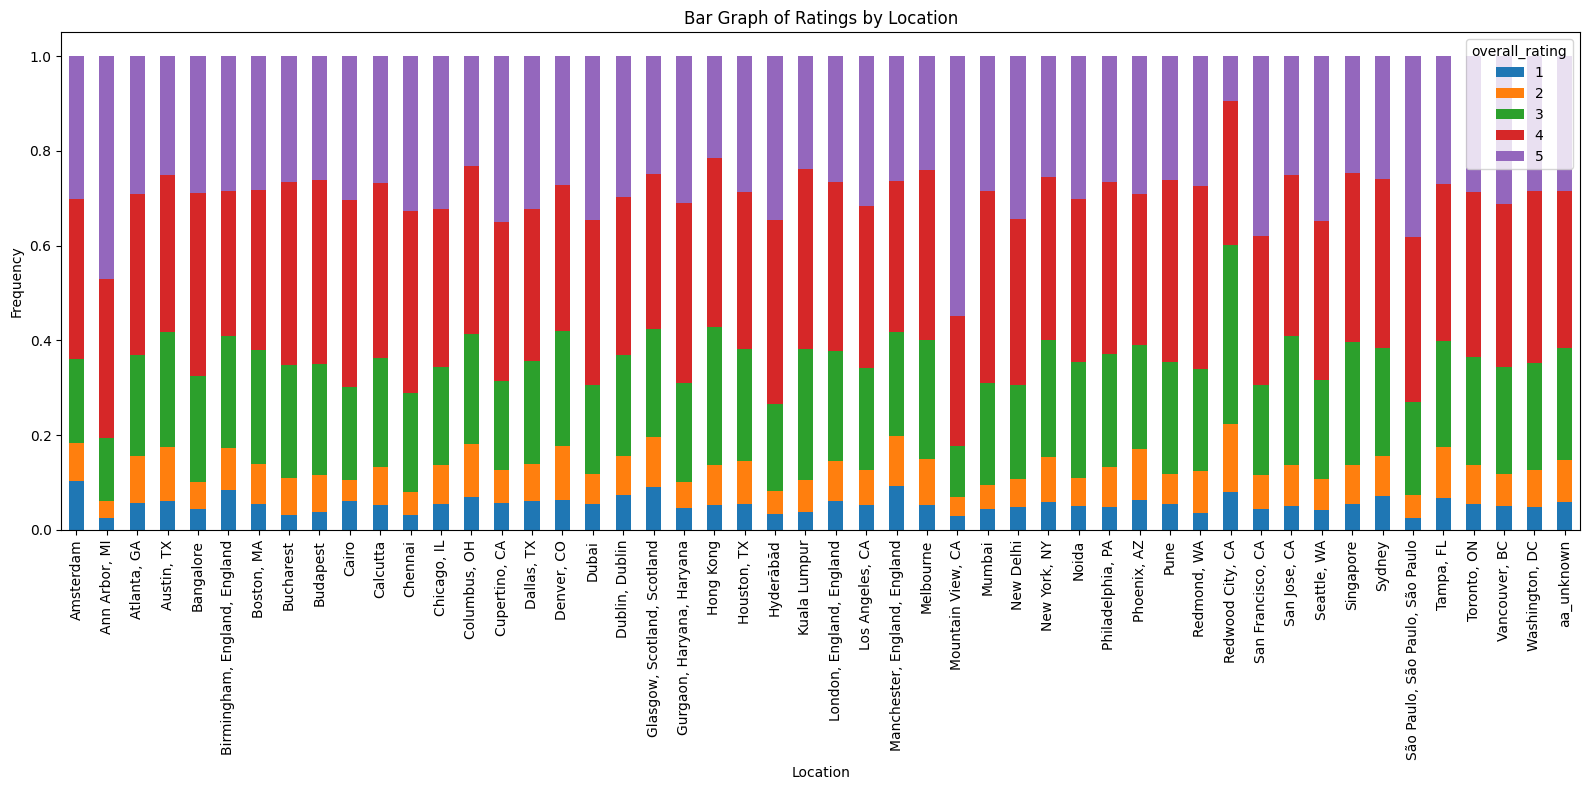

In [43]:
#bar graph of ratings [location]

### Check our unknown location values, check for bias
df_1 = df.copy() #copy method important here
df_1['location'] = df['location'].fillna('aa_unknown')
top_locations = df_1['location'].value_counts().head(50).index
df_top = df_1[df_1['location'].isin(top_locations)]

fig, axs = plt.subplots(figsize = (16,8))

#plot by percentage
loc_counts = df_top.groupby(['location', 'overall_rating']).size().unstack()
loc_proportions = loc_counts.div(loc_counts.sum(axis=1), axis=0)

loc_proportions.plot(kind ='bar', stacked = 'True', ax = axs)
axs.set_xlabel('Location')
axs.set_ylabel('Frequency')
axs.set_title('Bar Graph of Ratings by Location')

plt.tight_layout()
plt.show()

Looking at these locations, the trend seems relativley the same, but noticeably there are place with much higher 5-4* proportions than other cities
- The unknown locations are on trend with known locations
- there are definetly places I would much rather work at (Ann Arbor-MI, Mountain View-CA) and not want to work at (Redwood-CA)
- there can be many causes for this, let's keep location as an variable for further analysis later on.

In [44]:
### With variables with high cardinality: Let's think about grouping them with eastern, western, etc.


In [45]:
### We can drop unknown job values
### Dropping null values of other categories (Less than 20%)
### Strip all values without ratings for this data set

df.columns = df.columns.str.strip()
df = df.dropna(subset=['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt','headline','cons', 'location'])
df.shape

(295246, 14)

Since we're considering location (mainly the more concentrated ones), let's also remove all locations that's not well known

In [46]:
#remove all reviews with locations shown less than 100 times
location_counts = df['location'].value_counts()
locations_to_keep = location_counts[location_counts >= 100].index
df = df[df['location'].isin(locations_to_keep)]
df.shape

(242755, 14)

In [47]:
### Prepare for NLP later on
df['headline'].astype(str)
df['pros'].astype(str)
df['cons'].astype(str)

1242      Multi skills or greater performance are not fi...
1247        nothing nothing nothing nothing nothing nothing
1254      Salary is not attractive compare to the curren...
1258      Career progression slow, with many people sitt...
1259                          I can't really think of any .
                                ...                        
830742                            No cons of working in wtw
830744                       Less salary and slow promotion
830746    Slow growth\nLess opportunity\nVast company\nL...
830748                    I will have to\r\nLet\r\nYou know
830754    Quite slow pace, with not much exposure when a...
Name: cons, Length: 242755, dtype: object

#### 2.4.6 Resampling<a id ='2_4_6'></a>
- We still have 250000 datapoints, which may be unfeasible to work with. 
- We may need to limit our dataset, and since there are some firms with a high frequency, we can adjust those ones to even out
- Let's resample this to something more manageable

In [48]:
df.firm.value_counts().head(50) 

firm
IBM                       24959
Deloitte                  21075
EY                        15460
Oracle                    14074
PwC                       13427
Microsoft                 11446
J-P-Morgan                10496
KPMG                      10320
McDonald-s                 8069
Citi                       7411
Apple                      7355
SAP                        6882
HSBC-Holdings              5818
Google                     5743
Barclays                   4278
American-Express           4222
Salesforce                 4026
Thomson-Reuters            3979
Vodafone                   3641
Goldman-Sachs              3623
Morgan-Stanley             3457
Marriott-International     3381
Tesco                      3187
Deutsche-Bank              2904
BNY-Mellon                 2638
BT                         2540
Booking-com                2354
CBRE                       2241
Hilton                     2150
McKinsey-and-Company       2015
Unilever                   1966
Lin

In [51]:
### Interestingly the firm rankings changed quite a lot since we removed all firms in locations less than 100. 
### Mcdonalds was originally top2, but now its dropped down way lower. We can infer that mcdonalds (and other food/service) has presence
# in many small locations while tech and financial service companies are more prevelant in larger locations.
# Keep this in mind later on...

df.shape

(242755, 14)

In [56]:
# As we saw, there are still imbalances between firms, most notably IBM with 25000 ratings. 
# We will need to think how we will resample our data later on, but for now let's take this data and preprocess it for NLP

### 1st sample by limiting each firm (hold off on this, not accurate representation of dataset)
### Potential Resampling code

# n_samples = 5000

# def resample_firm_data(df, firm, n_samples):
#     firm_data = df[df['firm'] == firm]
#     if len(firm_data) > n_samples:
#         return firm_data.sample(n_samples, random_state=42)
#     else:
#         return firm_data

# firms = df['firm'].value_counts().index.tolist()

# df_resampled = pd.concat([resample_firm_data(df, firm, n_samples) for firm in firms])

### 2nd Sampling techniques: Random sampling of whole filtered data
### 3rd option, train 2 models with big firms, one with small firms
### Tech companies, Consulting, Financial services, then everything else (solve RAM issues)

In [53]:
df_resampled = df
df_resampled.shape

(242755, 14)

## 2.5 Reviews (Text Columns)  <a id = '2_5'></a>

We now take a look at the 3 columns (headline, pros, cons) reviews provided by employees
- First combine our text columns together to make
- We need to clean our text data, stematize/lemmatize, and tokenize them for future processing
- Way to handle spelling errors, we will be using a spell cheker

In [54]:
from tqdm import tqdm    #visual progress bar
import re
from spellchecker import SpellChecker

# *Note make sure to install -> python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
spell = SpellChecker()

# Combine text columns into one for processing
df_resampled['combined_text'] = df_resampled['headline'].fillna('') + ' ' + df_resampled['pros'].fillna('') + ' ' + df_resampled['cons'].fillna('')

# Function to preprocess text
def preprocess_text(text):

   # replace newlines and carriage returns with a space
    text = re.sub(r'[\r\n]+', ' ', text)
    # remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # lowercase the text
    text = text.lower()

    #spellchecker
    corrected_text = []
    for word in text.split():
        corrected_text.append(spell.correction(word))
    text = ' '.join(corrected_text)

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# nlp.pipe
def preprocess_texts(texts):
    preprocessed_texts = []
    for doc in tqdm(nlp.pipe(texts, batch_size=50, n_process=-1),total=len(texts)):
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        preprocessed_texts.append(' '.join(tokens))
    return preprocessed_texts

# Preprocess the combined text column
df_resampled['processed_text'] = preprocess_texts(df_resampled['combined_text'].tolist())

df_resampled.head()

100%|██████████| 242755/242755 [04:15<00:00, 951.42it/s] 


,firm,job_title,status,years,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,headline,pros,cons,combined_text,processed_text
1242,ASDA,Night Stocker,Former Employee,1,"Glasgow, Scotland, Scotland",3,3.0,2.0,3.0,3.0,2.0,"Mixed, it very much depends upon the Skills of...",If you live nearby and are physically sound t...,Multi skills or greater performance are not fi...,"Mixed, it very much depends upon the Skills of...",mixed depend Skills Manager seriously absent c...
1247,ASDA,Warehouse Operative,Current Employee,>10,"London, England, England",5,5.0,5.0,5.0,5.0,5.0,"very good the freshness,good,support,freedom a...","the freshness,good,support,freedom and attitude",nothing nothing nothing nothing nothing nothing,"very good the freshness,good,support,freedom a...",good freshness good support freedom attitude...
1254,ASDA,Availibility,Current Employee,1,"London, England, England",3,3.0,2.0,3.0,3.0,2.0,"Good company, cares about employees...",Helpful and friendly working environment,Salary is not attractive compare to the curren...,"Good company, cares about employees... Helpful...",good company care employee helpful friendly wo...
1258,ASDA,Customer Service Assistant,Current Employee,5,"Glasgow, Scotland, Scotland",3,5.0,4.0,3.0,2.0,4.0,"Good culture, Great group of people to work wi...","Easy work, good training, 10% off discount car...","Career progression slow, with many people sitt...","Good culture, Great group of people to work wi...",good culture great group people work career pr...
1259,ASDA,Checkout Support,Current Employee,1,"Cardiff, Wales, Wales",5,4.0,5.0,4.0,4.0,5.0,Working in asda,I have felt like i was working among my family...,I can't really think of any .,Working in asda I have felt like i was working...,work asda feel like work family work think


*** Note: We will want to keep combined text, NLTK vader sentiment  uses punctuation and caps as part as its features for sentiment analysis

In [55]:
df_resampled.head(3)

,firm,job_title,status,years,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,headline,pros,cons,combined_text,processed_text
1242,ASDA,Night Stocker,Former Employee,1,"Glasgow, Scotland, Scotland",3,3.0,2.0,3.0,3.0,2.0,"Mixed, it very much depends upon the Skills of...",If you live nearby and are physically sound t...,Multi skills or greater performance are not fi...,"Mixed, it very much depends upon the Skills of...",mixed depend Skills Manager seriously absent c...
1247,ASDA,Warehouse Operative,Current Employee,>10,"London, England, England",5,5.0,5.0,5.0,5.0,5.0,"very good the freshness,good,support,freedom a...","the freshness,good,support,freedom and attitude",nothing nothing nothing nothing nothing nothing,"very good the freshness,good,support,freedom a...",good freshness good support freedom attitude...
1254,ASDA,Availibility,Current Employee,1,"London, England, England",3,3.0,2.0,3.0,3.0,2.0,"Good company, cares about employees...",Helpful and friendly working environment,Salary is not attractive compare to the curren...,"Good company, cares about employees... Helpful...",good company care employee helpful friendly wo...


## 2.6 Exporting <a id = '2_6'></a>

#### Overview:
Dataset of 800000 filtered down 240000, focus on resampling later on
- Top 50 firms in dataset
- Missing Job titles (no bias)
- Missing Ratings
- Reviews with location instances of more than 100 -> Large work hot spots
- Resampled so each firm can have up to 5000 instances at most to even out distribution

In [57]:
#We cleaned our data, let's export the dataset:

data_folder = 'CleanedData'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

cleaned_data_path = os.path.join(data_folder, 'clean_data.csv')

df_resampled.to_csv(cleaned_data_path, index=False)